# Загрузка данных

In [1]:
import pandas as pd
import os

In [2]:
fname = os.path.join("Dataset_visits_clear.xlsx")
data = pd.read_excel(fname)
data.head()

,Идентификатор визита,"Идентификаторы просмотров, которые были в данном визите",Дата и время визита,Страница входа,Страница выхода,Количество просмотренных страниц,Время на сайте,Отказность портала
0,5.945968e+18,"[5945968348615282573,5945969237801111437]",2016-01-01 12:47:07,https://mos.ru/newyear/place_type,https://mos.ru/news/,2,233,0
1,5.945743e+18,[5945742643641253769],2015-12-31 21:28:44,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,14,0
2,5.945745e+18,[5945744916521625453],2015-12-31 21:37:59,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,15,0
3,5.945852e+18,"[5945851861522030292,5945853690184722272]",2016-01-01 04:53:08,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,2,460,0
4,5.945950e+18,[5945949749967062873],2016-01-01 11:31:27,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,28,0


# Проведение анализа

In [3]:
import numpy as np
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt

#### 1. С каких страниц чаще всего заходят на сайт?

In [4]:
entries = Counter(data['Страница входа'])
entries.most_common()

[('https://mos.ru/newyear/place_type', 28),
 ('https://mos.ru/', 27),
 ('https://mos.ru/news/', 7),
 ('https://mos.ru/newyear/article/4242073', 4),
 ('https://mos.ru/news/article/5334073', 2),
 ('https://mos.ru/advisor/reception', 2),
 ('https://mos.ru/newyear/place_type/2085', 2),
 ('https://mos.ru/authority/structure/', 2),
 ('https://mos.ru/authority/documents/doc/33686220', 2),
 ('https://mos.ru/newyear/event/9113088', 1),
 ('https://mos.ru/?result_43=2', 1),
 ('https://mos.ru/newyear/event/8594088', 1),
 ('https://mos.ru/mayor/themes', 1),
 ('https://mos.ru/newyear/event/8007088', 1),
 ('https://mos.ru/newyear/event/8256088', 1),
 ('https://mos.ru/news/article/5388073', 1),
 ('https://mos.ru/newyear/place/7500', 1),
 ('https://mos.ru/calendar/', 1),
 ('https://mos.ru/news/article/4774073', 1),
 ('https://mos.ru/newyear/article/4244073', 1),
 ('https://mos.ru/calendar/event/8770088/', 1),
 ('https://mos.ru/authority/structure/19686090/person/19719093', 1),
 ('https://mos.ru/news/ar

In [5]:
common_pages = [i for i in entries if entries[i] > 5]
common_pages

['https://mos.ru/newyear/place_type',
 'https://mos.ru/',
 'https://mos.ru/news/']

#### 2. Сколько в среднем времени проводят на сайте за один визит? 

In [6]:
time_ave = np.average(data[data['Время на сайте'] != 0]['Время на сайте'])
time_ave.round(2)

109.42

#### 3. Сколько в среднем страниц просматривают за один визит на сайт?

In [22]:
pages_ave = np.average(data[data['Время на сайте'] != 0]['Количество просмотренных страниц'])
pages_ave.round(1)

1.8

#### 4. Сколько в среднем времени уходит на просмотр одной страницы?

In [8]:
(time_ave/pages_ave).round(2)

59.75

#### 5. В каком промежутке времени производится наибольшее и наименьшее количество визитов?

In [9]:
data['Время визита (час)'] = pd.to_datetime(data['Дата и время визита']).dt.hour
data.head()

,Идентификатор визита,"Идентификаторы просмотров, которые были в данном визите",Дата и время визита,Страница входа,Страница выхода,Количество просмотренных страниц,Время на сайте,Отказность портала,Время визита (час)
0,5.945968e+18,"[5945968348615282573,5945969237801111437]",2016-01-01 12:47:07,https://mos.ru/newyear/place_type,https://mos.ru/news/,2,233,0,12
1,5.945743e+18,[5945742643641253769],2015-12-31 21:28:44,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,14,0,21
2,5.945745e+18,[5945744916521625453],2015-12-31 21:37:59,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,15,0,21
3,5.945852e+18,"[5945851861522030292,5945853690184722272]",2016-01-01 04:53:08,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,2,460,0,4
4,5.945950e+18,[5945949749967062873],2016-01-01 11:31:27,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,28,0,11


In [10]:
hour_vis = Counter(data['Время визита (час)'])
hour_vis

Counter({1: 3,
         2: 1,
         4: 1,
         6: 2,
         7: 8,
         8: 7,
         9: 4,
         10: 9,
         11: 6,
         12: 8,
         13: 4,
         14: 3,
         15: 7,
         16: 4,
         17: 4,
         18: 5,
         19: 7,
         20: 6,
         21: 3,
         22: 3,
         23: 5})

In [11]:
hv = pd.DataFrame.from_dict(hour_vis, orient='index').rename(columns={0:'Визиты'})

In [12]:
df = pd.DataFrame(columns=['Визиты'])
for i in range(0, 24):
  if not i in hv.index:
    df.loc[i] = 0

In [13]:
hv = hv.append(df).sort_index()
hv.head(10)

,Визиты
0,0
1,3
2,1
3,0
4,1
5,0
6,2
7,8
8,7
9,4


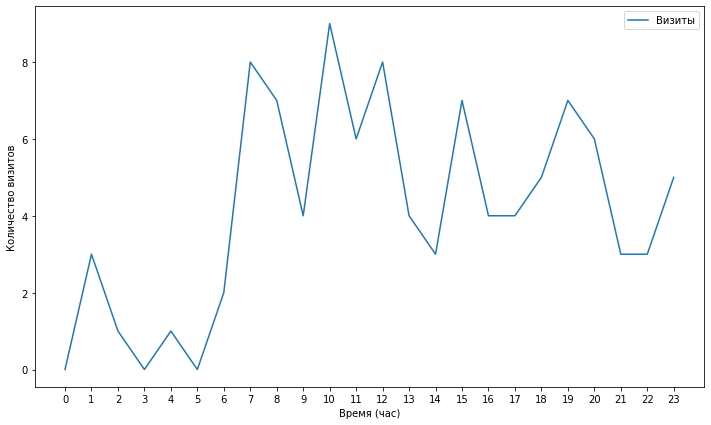

In [14]:
hv.plot.line(xticks=hv.index, xlabel='Время (час)', ylabel='Количество визитов', 
             figsize=(12,7));

#### 6. В каком промежутке времени чаще всего наблюдается отказность портала?

In [15]:
data_deny = data[data['Отказность портала'] == 1]
deny_hrs = Counter(data_deny['Время визита (час)'])
deny_hrs

Counter({1: 2,
         6: 1,
         7: 1,
         8: 2,
         10: 1,
         11: 1,
         12: 1,
         13: 1,
         15: 3,
         16: 3,
         19: 1,
         23: 1})

In [16]:
dh = pd.DataFrame.from_dict(deny_hrs, orient='index').rename(columns={0:'Отказы'})

In [17]:
df1 = pd.DataFrame(columns=['Отказы'])
for i in range(0, 24):
  if not i in dh.index:
    df1.loc[i] = 0

In [18]:
dh = dh.append(df1).sort_index()
dh.head(10)

,Отказы
0,0
1,2
2,0
3,0
4,0
5,0
6,1
7,1
8,2
9,0


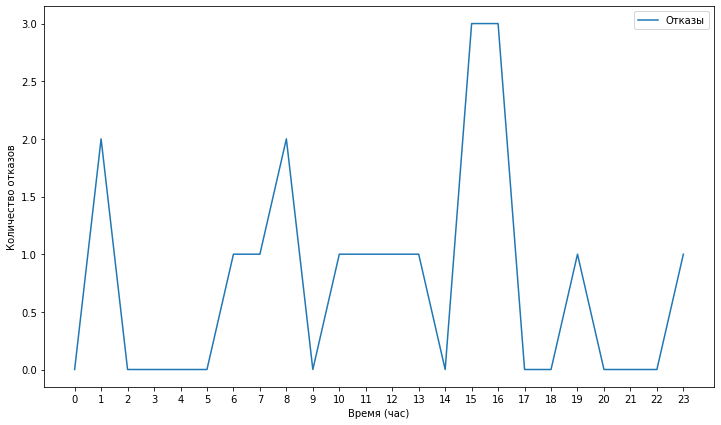

In [19]:
dh.plot.line(xticks=dh.index, xlabel='Время (час)', ylabel='Количество отказов', 
             figsize=(12,7));

#### 7. Связаны ли промежутки наибольшей посещаемости портала с промежутками его отказности?

In [20]:
n = pd.concat([hv, dh], axis=1)
n

,Визиты,Отказы
0,0,0
1,3,2
2,1,0
3,0,0
4,1,0
5,0,0
6,2,1
7,8,1
8,7,2
9,4,0


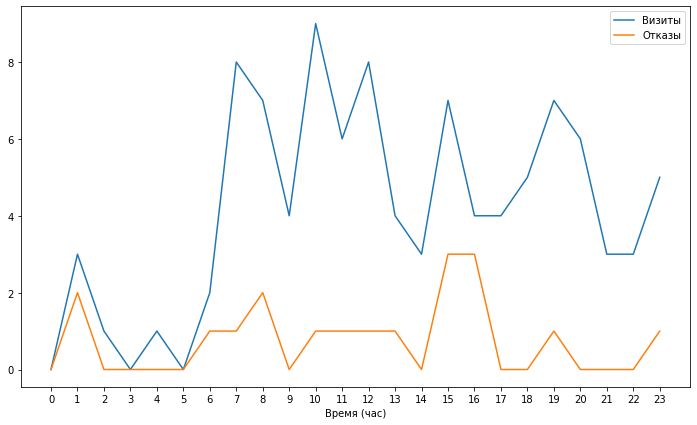

In [21]:
n.plot.line(xticks=n.index, xlabel='Время (час)', figsize=(12,7));